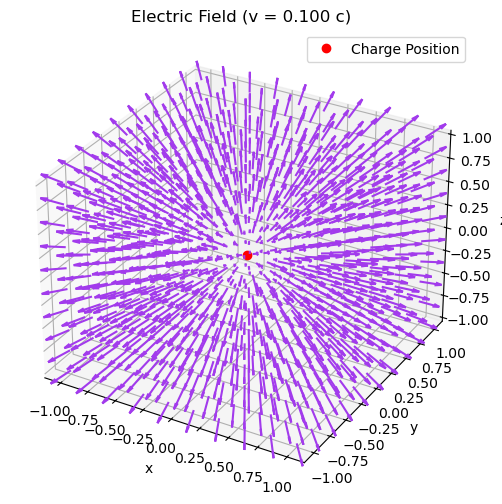

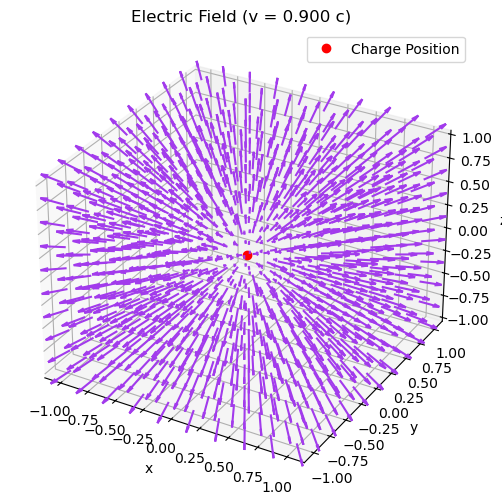

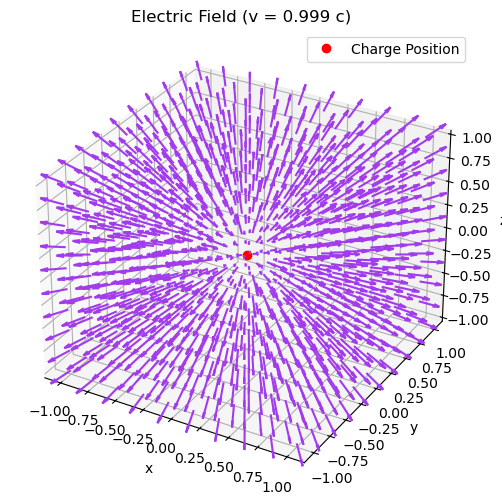

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.6e-19 #charge of electron in coloumbs
c = 3e8     #speed of light in m/s
v_values = [0.1*c, 0.9*c, 0.999*c] #velocities in m/s
t = 0       #considered time is 0 as the shape of field lines does not change with respect to time 

# 3D grid to create vectors
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 10)
X, Y, Z = np.meshgrid(x, y, z) # Generates 3D arrays representing coordinates of each point on the (x, y, z) grid.

for v in v_values:
# Electric Field components
    beta = v / c
    denom = ((X - v*t)**2 + ((1 - beta**2)*(Y**2+Z**2)))**(3/2)
    Ex = q * (1 - beta**2) * (X - v*t) / denom
    Ey = q * (1 - beta**2) * Y / denom
    Ez = q * (1 - beta**2) * Z / denom
# Normalize field (gives direction of the field)
    Emag = np.sqrt(Ex**2 + Ey**2 + Ez**2)
    Ex, Ey, Ez = Ex / Emag, Ey / Emag, Ez / Emag
# Create 3D quiver plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, Ex, Ey, Ez, length=0.2, normalize=True, color='#A23BEC')
    ax.plot(0, 0, 0, 'ro', label='Charge Position')
    ax.set_title(f'Electric Field (v = {v/c:.3f} c)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()

plt.show()


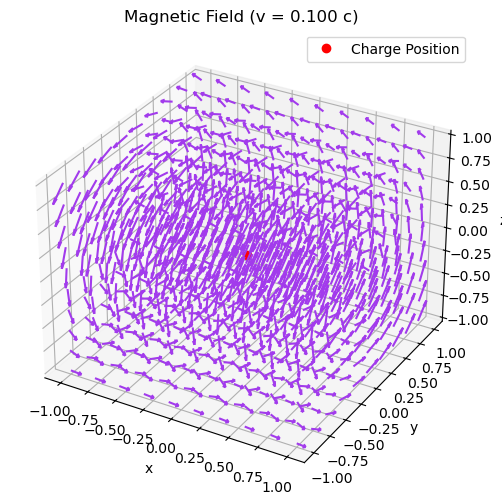

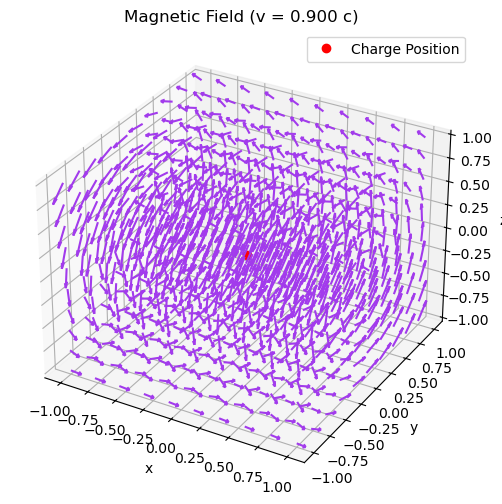

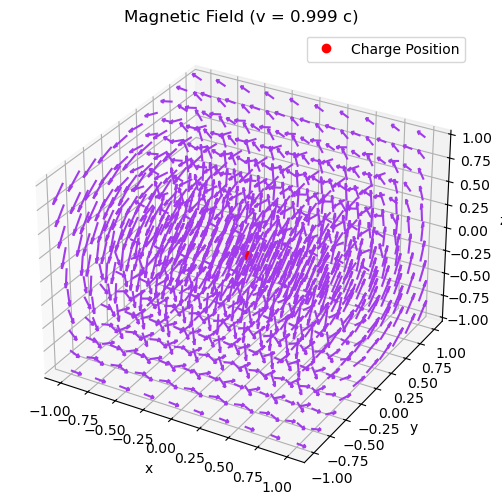

In [4]:
for v in v_values:
# Electric Field components
    beta = v / c
    denom = ((X - v*t)**2 + ((1 - beta**2)*(Y**2+Z**2)))**(3/2)
   
    Bx = np.zeros_like(X)  
    By = -q * (1 - beta**2) * Z / denom
    Bz = q * (1 - beta**2) * Y / denom
# Normalize field (gives direction of the field)
    Bmag = np.sqrt(Bx**2 + By**2 + Bz**2)
    Bmag = np.where(Bmag == 0, 1, Bmag)
    Bx, By, Bz = Bx / Bmag, By / Bmag, Bz / Bmag
# Create 3D quiver plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, Bx, By, Bz, length=0.2, normalize=True, color='#A23BEC')

    ax.plot(0, 0, 0, 'ro', label='Charge Position')
    ax.set_title(f'Magnetic Field (v = {v/c:.3f} c)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()

plt.show()

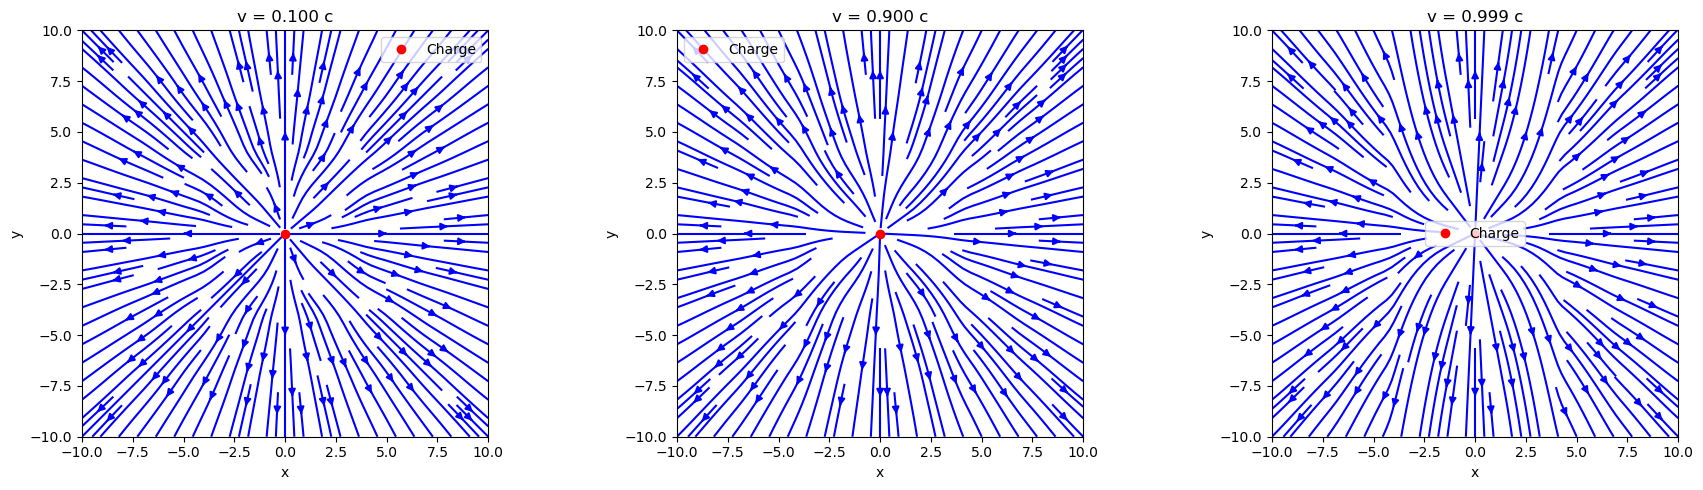

In [5]:
#2D plot of the electric field lines to observe beaming effect clearly
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.6e-19
c = 3e8
v_values = [0.1*c, 0.9*c, 0.999*c]
t = 0

# 2D grid (z=0 plane)
x = np.linspace(-10, 10, 8)
y = np.linspace(-10, 10, 8)
X, Y = np.meshgrid(x, y)
Z = 0

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, v in enumerate(v_values):
    beta = v / c
    denom = ((X - v*t)**2 + (1 - beta**2) * Y**2)**(1.5)
    Ex = q * (1 - beta**2) * (X - v*t) / denom
    Ey = q * (1 - beta**2) * Y / denom
    
    # Field magnitude
    E_mag = np.sqrt(Ex**2 + Ey**2)
    
    # Streamplot 
    strm = axes[i].streamplot(X, Y, Ex, Ey, color='blue', density=1.5)
    
    axes[i].plot(0, 0, 'ro', label='Charge')
    axes[i].set_title(f'v = {v/c:.3f} c')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_aspect('equal')
    axes[i].legend()

plt.tight_layout()
plt.show()
